<a href="https://colab.research.google.com/github/WaliMuhammadAhmad/7thSemester/blob/main/CVIP/CVIP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import shutil
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

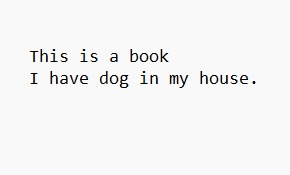

In [ ]:
img = cv2.imread("/content/cvip.jpeg")
cv2_imshow(img)

array([[[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]],

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]],

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]],

       ...,

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]],

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]],

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]]], dtype=uint8)
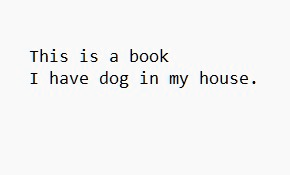

In [ ]:
img

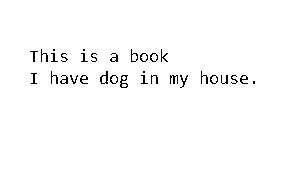

In [ ]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_image)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
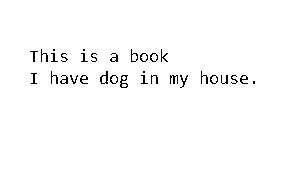

In [ ]:
binary_image

In [ ]:
print(binary_image.max())

255


In [ ]:
def show_img(img):
    cv2_imshow(img * 255)

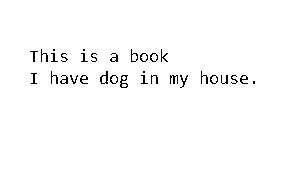

In [ ]:
binary = binary_image // 255
show_img(binary)

In [ ]:
print(binary)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [ ]:
binary.shape

(175, 290)

In [ ]:
pprint(binary)

Pretty printing has been turned OFF


In [ ]:
# def row_histogram(binary_image):
#   return [sum(1 for value in row if value != 0) for row in binary_image]

utilis

In [ ]:
def clean_directories(*dirs):
    for directory in dirs:
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory, exist_ok=True)

In [ ]:
def save_binary_image(grid, path):
    if grid.size == 0:
        return
    image = (grid * 255).astype(np.uint8)
    Image.fromarray(image).save(path)

In [ ]:
# def dfs(x, y, comp_pixels):
#   stack = [(x, y)]
#   while stack:
#       cx, cy = stack.pop()
#       if visited[cx, cy] or binary_image[cx, cy] == 1:  # skip if the pixel's been visited or is part of the background.
#           continue
#       visited[cx, cy] = True
#       comp_pixels.append((cx, cy))
#       for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
#           nx, ny = cx + dx, cy + dy
#           if 0 <= nx < binary_image.shape[0] and 0 <= ny < binary_image.shape[1]: # neighbor is within the image
#               stack.append((nx, ny))

main functions

In [ ]:
def to_binary(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(image, 127, 1, cv2.THRESH_BINARY)  # Foreground = 0, Background = 1
    return binary

In [ ]:
# print(to_binary('/content/cvip.jpeg'))

In [ ]:
def extract_connected_components(binary_image, output_dir):
    visited = np.zeros_like(binary_image, dtype=bool)  # Array to keep track which pixel is visited
    component_id = 1

    def dfs(x, y, comp_pixels):
        stack = [(x, y)]
        while stack:
            cx, cy = stack.pop()
            if visited[cx, cy] or binary_image[cx, cy] == 1:  # skip if the pixel's been visited or is part of the background.
                continue
            visited[cx, cy] = True
            comp_pixels.append((cx, cy))
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
                nx, ny = cx + dx, cy + dy
                if 0 <= nx < binary_image.shape[0] and 0 <= ny < binary_image.shape[1]: # neighbor is within the image
                    stack.append((nx, ny))

    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            if binary_image[i, j] == 0 and not visited[i, j]:  # Foreground = 0
                comp_pixels = []
                dfs(i, j, comp_pixels)
                if comp_pixels:
                    # Create component mask
                    rows, cols = zip(*comp_pixels)
                    comp_image = np.ones_like(binary_image)  # Background = 1
                    comp_image[rows, cols] = 0  # Foreground = 0
                    # Crop component
                    x_min, x_max = min(rows), max(rows) + 1
                    y_min, y_max = min(cols), max(cols) + 1
                    cropped = comp_image[x_min:x_max, y_min:y_max]
                    save_binary_image(cropped, f"{output_dir}/cc_{component_id}.png")
                    component_id += 1


In [ ]:
def row_histogram(binary_image):
    return np.sum(binary_image == 0, axis=1)

In [ ]:
# row_histogram(to_binary('/content/cvip.jpeg'))

In [ ]:
def extract_lines(binary_image):
    lines = []
    start = None
    for i, val in enumerate(row_histogram(binary_image)):
        if val > 0 and start is None:
            start = i
        elif val == 0 and start is not None:
            lines.append(binary_image[start:i])
            start = None
    if start is not None:
        lines.append(binary_image[start:])
    return lines

In [ ]:
def extract_words(line, threshold=10):
    col_hist = np.sum(line == 0, axis=0)  # for Foreground = 0
    words = []
    start = None
    gap = 0
    for i, val in enumerate(col_hist):
        if val > 0:
            if start is None:
                start = i
            gap = 0
        elif start is not None:
            gap += 1
            if gap >= threshold:
                words.append(line[:, start:i - gap])
                start = None
    if start is not None:
        words.append(line[:, start:])
    return words

# Main pipeline

In [ ]:

def process_image(image_path):
    clean_directories("lines", "words", "cc")
    binary = to_binary(image_path)

    # Extract lines
    lines = extract_lines(binary)
    for i, line in enumerate(lines, 1):
        save_binary_image(line, f"lines/line_{i}.png")

        # Extract words from line
        words = extract_words(line)
        for j, word in enumerate(words, 1):
            save_binary_image(word, f"words/line_{i}_word_{j}.png")

    # Extract connected components
    extract_connected_components(binary, "cc")

In [ ]:
process_image("/content/cvip.jpeg")

In [ ]:
os.listdir("./")

['.config', 'cvip.jpeg', 'words', 'cc', 'lines', 'sample_data']

In [ ]:
import zipfile

In [ ]:

def zip_files(file_paths, output_zip):
    with zipfile.ZipFile(output_zip, 'w') as zipf:
        for file_path in file_paths:
            if os.path.exists(file_path):
                zipf.write(file_path, os.path.basename(file_path))
            else:
                print(f"File not found: {file_path}")
    print(f"Files zipped successfully into {output_zip}")

zip_files(os.listdir("./"), "img.zip")

Files zipped successfully into img.zip
